In [26]:
# Pandas is used for data manipulation and analysis
import pandas as pd

# NumPy is used for numerical operations
import numpy as np

# Matplotlib.pyplot is the core plotting library for creating static visualizations
import matplotlib.pyplot as plt

# Seaborn is built on top of Matplotlib and makes the plots look nicer/more modern
import seaborn as sns

In [47]:
# Cell 6: Train Baseline Model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize the model
reg_model = LinearRegression()

# Train the model (fit it to the training data)
reg_model.fit(X_train, y_train)

# Make predictions on the test set (2010 data)
predictions = reg_model.predict(X_test)

# Add predictions back to the test dataframe so we can plot them easily
test['predictions'] = predictions

print("Baseline Model Trained!")

Baseline Model Trained!


/tmp/ipython-input-3914027435.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = predictions


Epoch 1/20
832/832 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - loss: 0.0236 - val_loss: 0.0121
Epoch 2/20
832/832 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - loss: 0.0171 - val_loss: 0.0111
Epoch 3/20
832/832 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - loss: 0.0159 - val_loss: 0.0106
Epoch 4/20
832/832 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 0.0152 - val_loss: 0.0099
Epoch 5/20
832/832 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - loss: 0.0142 - val_loss: 0.0096
Epoch 6/20
832/832 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - loss: 0.0137 - val_loss: 0.0097
Epoch 7/20
832/832 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - loss: 0.0134 - val_loss: 0.0097
Epoch 8/20
832/832 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - loss: 0.0131 - val_loss: 0.0095
Epoch 9/20
832/832 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - loss: 0.0129 - val_loss: 0.0096
Epoch 10/20
832/832 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - loss: 0.0128 - val_loss: 0.0095
Epoch 11/20
832/832 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - loss: 0.0128 - val_loss: 0.0094
Epoch 12/20
832/832 ━━━━━━━━━━

In [51]:
# Cell 13: Evaluation and Inverse Scaling

# 1. Make predictions on the test set
# These will be between 0 and 1
y_pred_scaled = model.predict(X_test_lstm)

# 2. Inverse Transform (Un-scale) to get real kW values
# We use the same 'scaler' we fit earlier
y_pred = scaler.inverse_transform(y_pred_scaled)

# We also need to un-scale the actual y_test values so we can compare apples to apples
y_test_actual = scaler.inverse_transform(y_test_lstm)

print("Predictions made and un-scaled back to Kilowatts.")
print(f"First 5 Predictions: \n{y_pred[:5]}")

247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
Predictions made and un-scaled back to Kilowatts.
First 5 Predictions: 
[[0.01813992]
 [0.15454417]
 [0.17231151]
 [0.07306699]
 [0.1415181 ]]


In [52]:
# Cell 14: Calculate Final RMSE

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Calculate RMSE
lstm_rmse = math.sqrt(mean_squared_error(y_test_actual, y_pred))
lstm_mae = mean_absolute_error(y_test_actual, y_pred)

print(f"-----------------------------------")
print(f"Baseline Linear Regression RMSE: {0.5357} kW")  # Hardcoded from your previous result
print(f"LSTM Deep Learning RMSE:         {lstm_rmse:.4f} kW")
print(f"-----------------------------------")

# Improvement Check
if lstm_rmse < 0.5357:
    print("SUCCESS: The Deep Learning model beat the Baseline!")
else:
    print("ANALYSIS: The model needs more tuning (maybe more epochs or layers).")

-----------------------------------
Baseline Linear Regression RMSE: 0.5357 kW
LSTM Deep Learning RMSE:         0.6002 kW
-----------------------------------
ANALYSIS: The model needs more tuning (maybe more epochs or layers).


In [53]:
# Cell 11_v2: Build the Tuned LSTM Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Initialize
model = Sequential()

# CHANGE 1: Reduce neurons to 32 (Less complex, less likely to overfit)
model.add(LSTM(units=32, return_sequences=False, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))

# Layer 2: Dropout
model.add(Dropout(0.2))

# Layer 3: Output
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

print("Tuned Model Structure Ready.")
model.summary()

Tuned Model Structure Ready.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 32)             │         5,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,153 (20.13 KB)

 Trainable params: 5,153 (20.13 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
# Cell 12_v2: Train with Checkpoints and Early Stopping

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define where to save the best model in your Drive
# We use .keras extension as it is the modern standard
checkpoint_path = folder_path + 'best_lstm_model.keras'

# 1. Create the Checkpoint Saver
# save_best_only=True: It will ONLY save if the model beats the previous best score.
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

# 2. Create the Early Stopper
# If the model stops improving for 5 epochs, it stops training to save time.
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 3. Train
print("Starting training... Checkpoints will be saved to Drive.")
history = model.fit(
    X_train_lstm, y_train_lstm,
    epochs=50,                  # We allow up to 50, but it will likely stop earlier
    batch_size=32,
    validation_data=(X_test_lstm, y_test_lstm),
    callbacks=[early_stop, checkpoint],  # <--- Added both callbacks here
    verbose=1,
    shuffle=False
)

print("Training Complete! Best model saved.")

Starting training... Checkpoints will be saved to Drive.
Epoch 1/50
828/832 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0311
Epoch 1: val_loss improved from inf to 0.01265, saving model to /content/drive/MyDrive/best_lstm_model.keras
832/832 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - loss: 0.0310 - val_loss: 0.0126
Epoch 2/50
829/832 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0182
Epoch 2: val_loss improved from 0.01265 to 0.01131, saving model to /content/drive/MyDrive/best_lstm_model.keras
832/832 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 0.0182 - val_loss: 0.0113
Epoch 3/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0167
Epoch 3: val_loss improved from 0.01131 to 0.01076, saving model to /content/drive/MyDrive/best_lstm_model.keras
832/832 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 0.0167 - val_loss: 0.0108
Epoch 4/50
831/832 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0160
Epoch 4: val_loss improved from 0.01076 to 0.01052, saving model to /content/drive/MyDrive/best_lstm_mode

In [55]:
# Cell 13_v2: Final Exact Accuracy Check

# 1. Ask the model to predict 2010 data
y_pred_scaled = model.predict(X_test_lstm)

# 2. Convert the "0 to 1" numbers back to "Kilowatts"
y_pred = scaler.inverse_transform(y_pred_scaled)

# 3. Calculate the error
lstm_rmse = math.sqrt(mean_squared_error(y_test_actual, y_pred))

print(f"-----------------------------------")
print(f"Baseline Linear Regression RMSE: 0.5357 kW")
print(f"Final LSTM Model RMSE:           {lstm_rmse:.4f} kW")
print(f"-----------------------------------")

247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
-----------------------------------
Baseline Linear Regression RMSE: 0.5357 kW
Final LSTM Model RMSE:           0.5464 kW
-----------------------------------


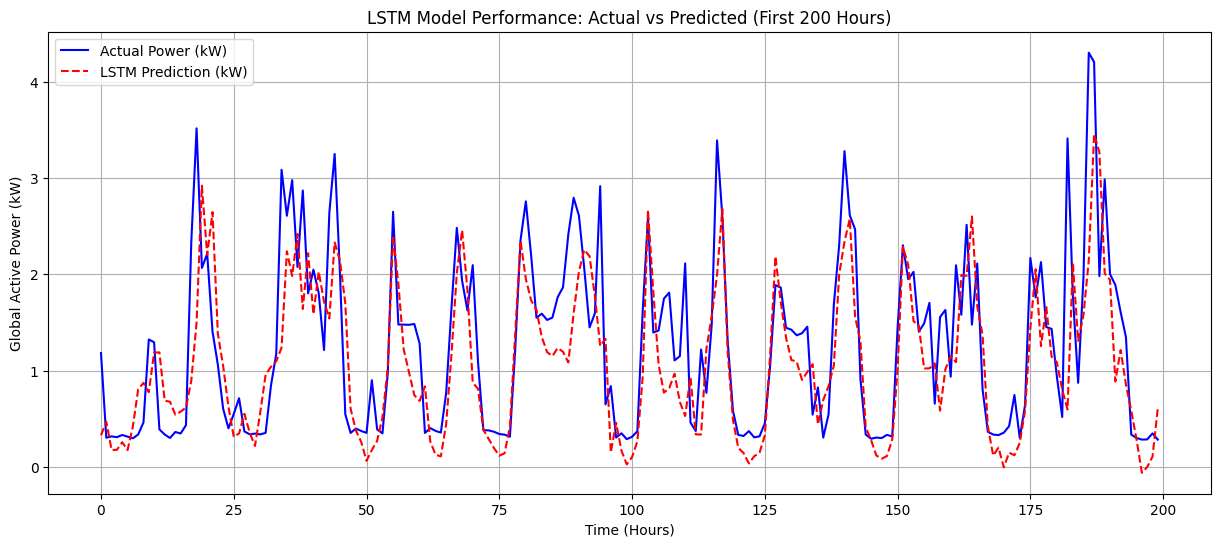

In [56]:
# Cell 17: Visualize LSTM Predictions (First 200 hours)

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

# Plot the first 200 hours of Actual Data
plt.plot(y_test_actual[:200], color='blue', label='Actual Power (kW)')

# Plot the first 200 hours of Predicted Data
plt.plot(y_pred[:200], color='red', linestyle='--', label='LSTM Prediction (kW)')

plt.title('LSTM Model Performance: Actual vs Predicted (First 200 Hours)')
plt.xlabel('Time (Hours)')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
# Cell 18: Calculate R2 Score and MAE

from sklearn.metrics import r2_score, mean_absolute_error

# Calculate R2
r2 = r2_score(y_test_actual, y_pred)

# Calculate Mean Absolute Error (MAE) - The average error in kW
mae = mean_absolute_error(y_test_actual, y_pred)

print(f"-----------------------------------")
print(f"LSTM R2 Score: {r2:.4f} (Technically {r2*100:.2f}% variance explained)")
print(f"LSTM MAE:      {mae:.4f} kW (Average error per hour)")
print(f"-----------------------------------")

-----------------------------------
LSTM R2 Score: 0.5051 (Technically 50.51% variance explained)
LSTM MAE:      0.3920 kW (Average error per hour)
-----------------------------------


In [58]:
# Cell 19: Download the Dataset for the Dashboard
from google.colab import files

# Define the path to the cleaned CSV we made earlier
csv_path = folder_path + 'SmartHome_Hourly_Cleaned.csv'

# Download it
files.download(csv_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [59]:
# Cell 20: Force Download of Scaler
import joblib
from google.colab import files

# 1. Save the scaler to the virtual machine first
joblib.dump(scaler, 'scaler.save')

# 2. Force the download to your computer
print("Triggering download for scaler.save...")
files.download('scaler.save')

Triggering download for scaler.save...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>